### http://kaggle.com/datasets/mirichoi0218/insurance

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRFRegressor



In [32]:
df=pd.read_csv("/home/sachchida/gitrepo/ml/data/insurance/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [33]:
label_column=df.select_dtypes(exclude="number").columns
print(label_column)

Index(['sex', 'smoker', 'region'], dtype='object')


In [34]:
numeric_column=df.select_dtypes(include="number").columns
print(label_column)

Index(['sex', 'smoker', 'region'], dtype='object')


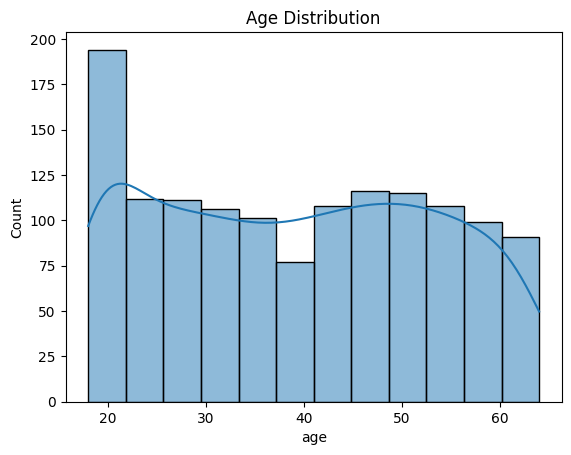

In [35]:
plt.figure()
sns.histplot(df['age'],kde=True)
plt.title("Age Distribution")
plt.show()

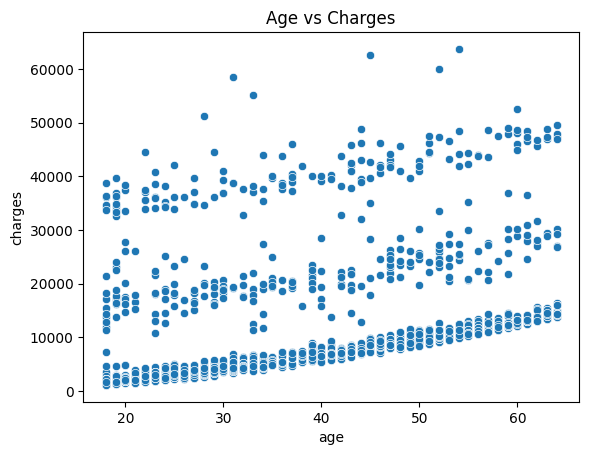

In [36]:
sns.scatterplot(x='age', y='charges', data=df)
plt.title("Age vs Charges")
plt.show()

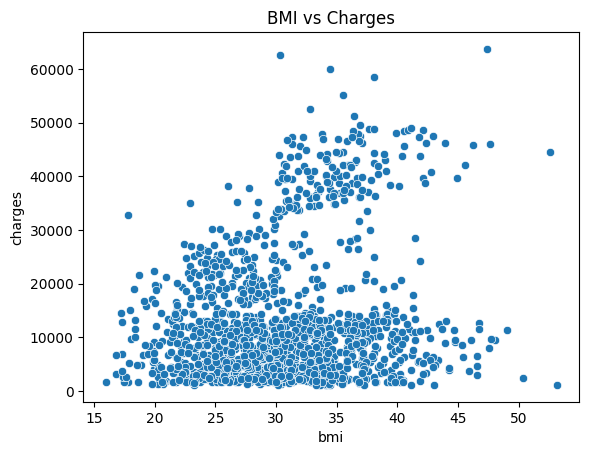

In [37]:
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title("BMI vs Charges")
plt.show()

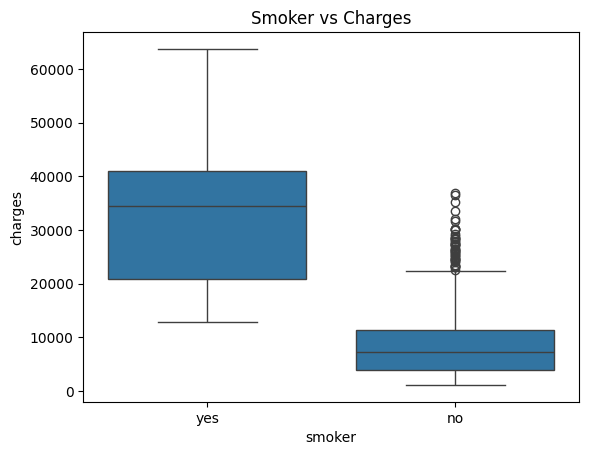

In [38]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Smoker vs Charges")
plt.show()

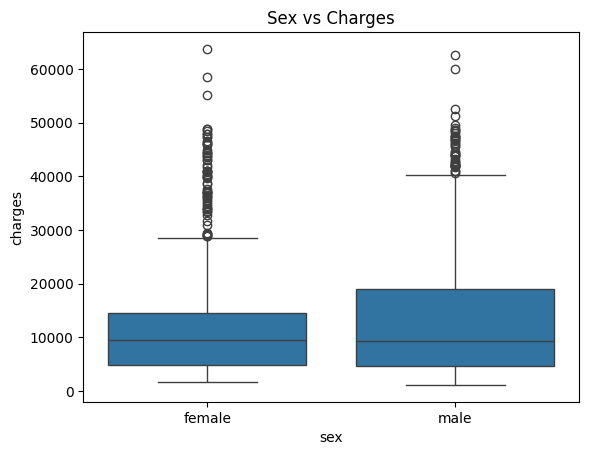

In [39]:
sns.boxplot(x='sex', y='charges', data=df)
plt.title("Sex vs Charges")
plt.show()

In [40]:
std_scaler=StandardScaler()
for col in numeric_column:
    if col!="charges":
        df[col]=std_scaler.fit_transform(df[[col]])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,female,-0.453320,-0.908614,yes,southwest,16884.92400
1,-1.509965,male,0.509621,-0.078767,no,southeast,1725.55230
2,-0.797954,male,0.383307,1.580926,no,southeast,4449.46200
3,-0.441948,male,-1.305531,-0.908614,no,northwest,21984.47061
4,-0.513149,male,-0.292556,-0.908614,no,northwest,3866.85520


In [42]:
charges_std_scaler=StandardScaler()
df['charges']=charges_std_scaler.fit_transform(df[['charges']])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,female,-0.453320,-0.908614,yes,southwest,0.298584
1,-1.509965,male,0.509621,-0.078767,no,southeast,-0.953689
2,-0.797954,male,0.383307,1.580926,no,southeast,-0.728675
3,-0.441948,male,-1.305531,-0.908614,no,northwest,0.719843
4,-0.513149,male,-0.292556,-0.908614,no,northwest,-0.776802


In [43]:
label_encoder=LabelEncoder()
for col in label_column:
    df[col]=label_encoder.fit_transform(df[[col]])
df.head()

/home/sachchida/anaconda3/envs/cuda_12_8/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sachchida/anaconda3/envs/cuda_12_8/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sachchida/anaconda3/envs/cuda_12_8/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,-0.908614,1,3,0.298584
1,-1.509965,1,0.509621,-0.078767,0,2,-0.953689
2,-0.797954,1,0.383307,1.580926,0,2,-0.728675
3,-0.441948,1,-1.305531,-0.908614,0,1,0.719843
4,-0.513149,1,-0.292556,-0.908614,0,1,-0.776802


In [44]:
df.shape

(1338, 7)

In [45]:
pd.set_option('display.max_rows', None)
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [46]:
y=df['charges']
X=df.drop(['charges'],axis=1)
X.shape

(1338, 6)

In [47]:
corr_with_target=df.corr()['charges'].sort_values(key=np.abs,ascending=False)
corr_with_target

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

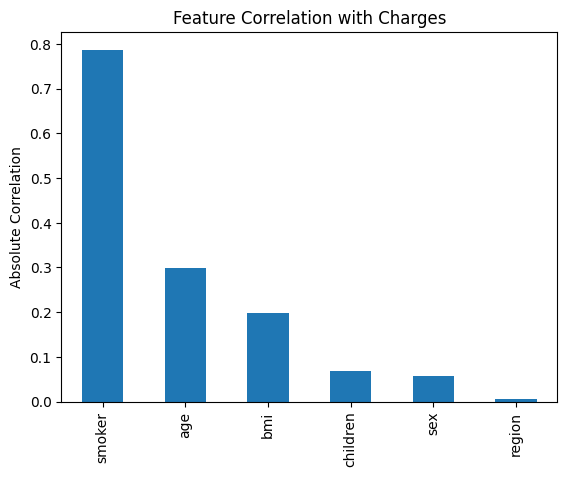

In [48]:
corr_with_target.drop('charges').abs().plot(kind='bar')
plt.title("Feature Correlation with Charges")
plt.ylabel("Absolute Correlation")
plt.show()

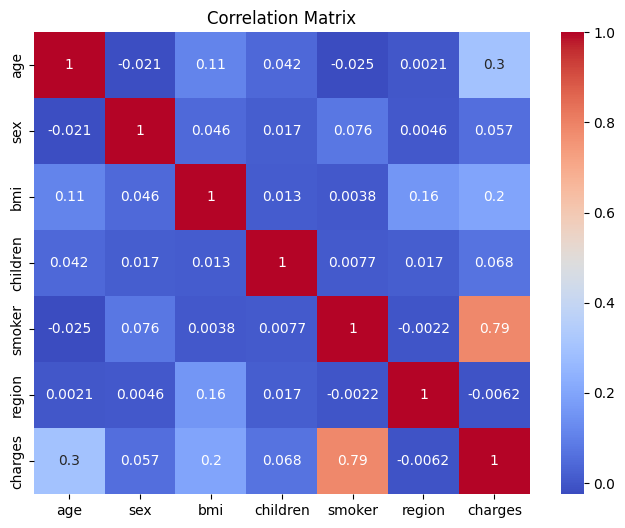

In [49]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Matrix")
plt.show()

In [50]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.25)

In [51]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)


In [52]:
y_test_original=charges_std_scaler.inverse_transform(y_test.values.reshape(-1,1))
y_pred_original=charges_std_scaler.inverse_transform(y_pred.reshape(-1,1))

In [54]:
comparison_df=pd.DataFrame({'Actual':y_test_original.flatten(),'Predicted':y_pred_original.flatten(),'diff':y_test_original.flatten()-y_pred_original.flatten()})
comparison_df.head(10)

,Actual,Predicted,diff
0,7740.33700,11488.788822,-3748.451822
1,4340.44090,4357.379731,-16.938831
2,47462.89400,39707.910893,7754.983107
3,12404.87910,8446.097964,3958.781136
4,2480.97910,6597.987641,-4117.008541
5,11085.58680,11653.956252,-568.369452
6,27218.43725,36690.310157,-9471.872907
7,42856.83800,36099.615511,6757.222489
8,7228.21565,6476.646741,751.568909
9,4185.09790,3972.914565,212.183335


In [55]:
mse=mean_squared_error(y_test_original,y_pred_original)
mse

34098293.39867605

In [56]:
rmse=mse**0.5
rmse

5839.374401310131

In [57]:
r2 = r2_score(y_test, y_pred)
r2

0.7652926481554118

In [63]:
ridge = Ridge(alpha=0.01) 
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

mse=mean_squared_error(y_test, y_pred)
print("Ridge Regression")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mse))
print("R2 Score:", r2_score(y_test, y_pred))

Ridge Regression
MSE: 0.23268247937970016
RMSE: 0.48237172323810623
R2 Score: 0.7652951203174346


In [59]:
lasso = Lasso(alpha=0.001)  # smaller alpha → less shrinkage
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
print("Lasso Regression")
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))
print("R2 Score:", r2_score(y_test, y_pred))

Lasso Regression
MSE: 0.2324767609177722
RMSE: 0.4821584396417553
R2 Score: 0.7655026268172106


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

# Example for Ridge
params = {'alpha':[0.01, 0.1, 1, 10, 50, 100]}
grid = GridSearchCV(Ridge(), param_grid=params, cv=5)
grid.fit(X_train, y_train)
print("Best alpha for Ridge:", grid.best_params_)

# Example for Lasso
params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1]}
grid = GridSearchCV(Lasso(), param_grid=params, cv=5)
grid.fit(X_train, y_train)
print("Best alpha for Lasso:", grid.best_params_)

Best alpha for Ridge: {'alpha': 0.01}
Best alpha for Lasso: {'alpha': 0.001}


In [64]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Ridge with best alpha
ridge_final = Ridge(alpha=50)
ridge_final.fit(X_train, y_train)
y_pred_ridge = ridge_final.predict(X_test)

# Lasso with best alpha
lasso_final = Lasso(alpha=0.01)
lasso_final.fit(X_train, y_train)
y_pred_lasso = lasso_final.predict(X_test)

# Evaluate
def evaluate(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} -> MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

evaluate(y_test, y_pred_ridge, "Ridge")
evaluate(y_test, y_pred_lasso, "Lasso")

Ridge -> MSE: 0.2622, RMSE: 0.5121, R2: 0.7355
Lasso -> MSE: 0.2314, RMSE: 0.4810, R2: 0.7666


In [65]:
rf=RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
rf.fit(
    X_train,y_train
)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")


MSE: 0.2327
RMSE: 0.4824
R2: 0.7653


In [66]:
feat_imp=pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance',ascending=False)
feat_imp

,Feature,Importance
4,smoker,0.611034
2,bmi,0.210113
0,age,0.135125
3,children,0.020631
5,region,0.016031
1,sex,0.007067


In [67]:
gbr = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"GBR MSE: {mse:.4f}")
print(f"GBR RMSE: {rmse:.4f}")
print(f"GBR R²: {r2:.4f}")

GBR MSE: 0.1373
GBR RMSE: 0.3705
GBR R²: 0.8615


In [68]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize model
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method='hist', 
    eval_metric='rmse'
)

# Train
xgb.fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost MSE: {mse:.4f}")
print(f"XGBoost RMSE: {rmse:.4f}")
print(f"XGBoost R²: {r2:.4f}")


XGBoost MSE: 0.1367
XGBoost RMSE: 0.3697
XGBoost R²: 0.8621


In [69]:
y_test_original=charges_std_scaler.inverse_transform(y_test.values.reshape(-1,1))
y_pred_original=charges_std_scaler.inverse_transform(y_pred.reshape(-1,1))
comparison_df=pd.DataFrame({'Actual':y_test_original.flatten(),'Predicted':y_pred_original.flatten(),'diff':y_test_original.flatten()-y_pred_original.flatten()})
comparison_df.head(10)

,Actual,Predicted,diff
0,7740.33700,8193.277344,-452.940344
1,4340.44090,6035.975586,-1695.534686
2,47462.89400,44424.726562,3038.167438
3,12404.87910,8757.406250,3647.472850
4,2480.97910,4999.969727,-2518.990627
5,11085.58680,14463.546875,-3377.960075
6,27218.43725,27929.085938,-710.648688
7,42856.83800,40719.093750,2137.744250
8,7228.21565,7828.666016,-600.450366
9,4185.09790,6324.700195,-2139.602295


In [70]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(
    y_test_original, y_pred_original
) * 100

print(f"MAPE: {mape:.2f}%")

MAPE: 35.81%
